# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [143]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [144]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

520

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [145]:
#getting the info needed for the appends
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key + "&q=" + 'atlanta'
requests.get(url).json()

{'coord': {'lon': -84.388, 'lat': 33.749},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 48.11,
  'feels_like': 47.53,
  'temp_min': 45.41,
  'temp_max': 50.74,
  'pressure': 1025,
  'humidity': 41},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 295, 'gust': 7},
 'clouds': {'all': 0},
 'dt': 1644185465,
 'sys': {'type': 2,
  'id': 2041852,
  'country': 'US',
  'sunrise': 1644150620,
  'sunset': 1644189179},
 'timezone': -18000,
 'id': 4180439,
 'name': 'Atlanta',
 'cod': 200}

In [146]:
print("Beginning Data Retrieval\n")
numbers = 1
numberstart = 1

cits = []
lat = []
long = []
temperatures = []
hum = []
cloud = []
wind = []
countries = []
dates = []

for city in cities:
    print(f'Processing record {numbers} of Set {numberstart} | {city}')
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key + "&q=" + city
        citiesweather = requests.get(url).json()
        cits.append(citiesweather['name'])
        lat.append(citiesweather['coord']['lat'])
        long.append(citiesweather['coord']['lon'])
        temperatures.append(citiesweather['main']['temp_max'])
        hum.append(citiesweather['main']['humidity'])
        cloud.append(citiesweather['clouds']['all'])
        wind.append(citiesweather['wind']['speed'])
        countries.append(citiesweather['sys']['country'])
        dates.append(citiesweather['dt'])
        numbers = numbers + 1
        if numbers > 50:
            numbers = 1
            numberstart = numberstart + 1
            time.sleep(60)
    except:
        print("City not found, skipping.")
        

Beginning Data Retrieval

Processing record 1 of Set 1 | naze
Processing record 2 of Set 1 | saskylakh
Processing record 3 of Set 1 | san patricio
Processing record 4 of Set 1 | hermanus
Processing record 5 of Set 1 | kapaa
Processing record 6 of Set 1 | albany
Processing record 7 of Set 1 | kattivakkam
Processing record 8 of Set 1 | saleaula
City not found, skipping.
Processing record 8 of Set 1 | richards bay
Processing record 9 of Set 1 | bredasdorp
Processing record 10 of Set 1 | beaupre
Processing record 11 of Set 1 | aklavik
Processing record 12 of Set 1 | chokurdakh
Processing record 13 of Set 1 | caravelas
Processing record 14 of Set 1 | bluff
Processing record 15 of Set 1 | hualmay
Processing record 16 of Set 1 | jamestown
Processing record 17 of Set 1 | grand centre
City not found, skipping.
Processing record 17 of Set 1 | talnakh
Processing record 18 of Set 1 | ushuaia
Processing record 19 of Set 1 | ribeira grande
Processing record 20 of Set 1 | hobart
Processing record 21 

Processing record 12 of Set 4 | salta
Processing record 13 of Set 4 | ayagoz
Processing record 14 of Set 4 | filingue
Processing record 15 of Set 4 | sobolevo
Processing record 16 of Set 4 | georgetown
Processing record 17 of Set 4 | iqaluit
Processing record 18 of Set 4 | bambanglipuro
Processing record 19 of Set 4 | tiznit
Processing record 20 of Set 4 | meridian
Processing record 21 of Set 4 | belaya gora
Processing record 22 of Set 4 | hihifo
City not found, skipping.
Processing record 22 of Set 4 | kusk
City not found, skipping.
Processing record 22 of Set 4 | alofi
Processing record 23 of Set 4 | dikson
Processing record 24 of Set 4 | pskov
Processing record 25 of Set 4 | condega
Processing record 26 of Set 4 | port lincoln
Processing record 27 of Set 4 | vao
Processing record 28 of Set 4 | itaberaba
Processing record 29 of Set 4 | khrebtovaya
Processing record 30 of Set 4 | wasilla
Processing record 31 of Set 4 | severo-kurilsk
Processing record 32 of Set 4 | lasa
Processing rec

Processing record 44 of Set 7 | mirina
City not found, skipping.
Processing record 44 of Set 7 | waipawa
Processing record 45 of Set 7 | urumqi
Processing record 46 of Set 7 | kincardine
Processing record 47 of Set 7 | karauzyak
City not found, skipping.
Processing record 47 of Set 7 | ajaccio
Processing record 48 of Set 7 | horasan
Processing record 49 of Set 7 | soyo
Processing record 50 of Set 7 | verkhnevilyuysk
Processing record 1 of Set 8 | tumannyy
City not found, skipping.
Processing record 1 of Set 8 | auki
Processing record 2 of Set 8 | katsuura
Processing record 3 of Set 8 | makakilo city
Processing record 4 of Set 8 | arkansas city
Processing record 5 of Set 8 | dwarka
Processing record 6 of Set 8 | le port
Processing record 7 of Set 8 | alice springs
Processing record 8 of Set 8 | cookeville
Processing record 9 of Set 8 | maceio
Processing record 10 of Set 8 | abha
Processing record 11 of Set 8 | terney
Processing record 12 of Set 8 | synya
Processing record 13 of Set 8 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [147]:
city_data = pd.DataFrame({"City": cits,
            "Lat": lat,
            "Lng": long,
            "Temp": temperatures,
            "Humidity": hum,
            "Cloudiness": cloud,
            "Wind Speed": wind,
            "Country": countries,
            "Date": dates})
city_data

city_data.to_csv(output_data_file)

In [148]:
city_data.describe()

,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Date
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,4.760000e+02
mean,20.659626,15.635138,47.880168,73.504202,55.500000,7.908887,1.644186e+09
std,33.385890,91.117180,32.590045,21.506278,41.142346,5.856811,2.397645e+02
min,-54.800000,-175.200000,-43.910000,9.000000,0.000000,0.000000,1.644185e+09
25%,-7.959000,-64.476750,27.700000,64.000000,7.750000,3.440000,1.644186e+09
50%,25.075000,19.087550,60.630000,78.000000,67.000000,6.710000,1.644186e+09
75%,47.979950,95.412475,74.645000,90.000000,100.000000,11.220000,1.644186e+09
max,78.218600,179.316700,93.420000,100.000000,100.000000,44.740000,1.644186e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [149]:
#  Get the indices of cities that have humidity over 100%.


In [150]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

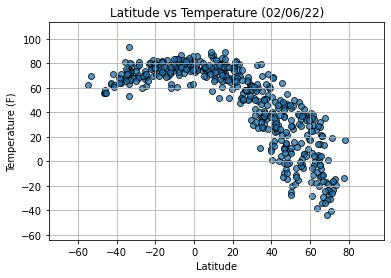

In [151]:
plt.scatter(city_data['Lat'],city_data['Temp'],alpha=0.75,edgecolors='black')
plt.title(f"Latitude vs Temperature ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Temperature (F)')
plt.xlim(min(city_data['Lat'])-20,max(city_data['Lat'])+20)
plt.ylim(min(city_data['Temp'])-20,max(city_data['Temp'])+20)
plt.grid()
plt.savefig("pngs/latvtemp.png")

# As latitude increases, temperatures drop, this makes sense as countries located in the northern hemisphere
# typically experience colder temperatures.



## Latitude vs. Humidity Plot

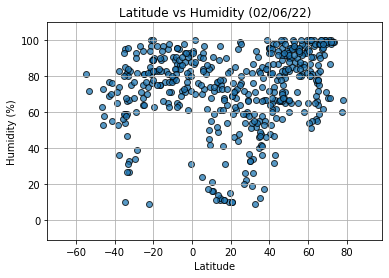

In [152]:
plt.scatter(city_data['Lat'],city_data['Humidity'],alpha=0.75,edgecolors='black')
plt.title(f"Latitude vs Humidity ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Humidity (%)')
plt.xlim(min(city_data['Lat'])-20,max(city_data['Lat'])+20)
plt.ylim(min(city_data['Humidity'])-20,max(city_data['Humidity'])+10)
plt.grid()
plt.savefig("pngs/latvhum.png")

# Data is all over the place, showing no apparent relationship between the two variables.

## Latitude vs. Cloudiness Plot

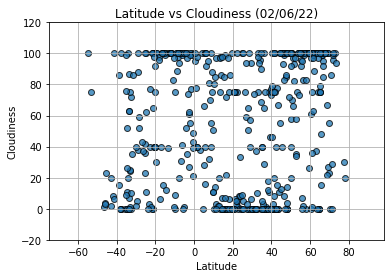

In [153]:
plt.scatter(city_data['Lat'],city_data['Cloudiness'],alpha=0.75,edgecolors='black')
plt.title(f"Latitude vs Cloudiness ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness')
plt.xlim(min(city_data['Lat'])-20,max(city_data['Lat'])+20)
plt.ylim(min(city_data['Cloudiness'])-20,max(city_data['Cloudiness'])+20)
plt.grid()
plt.savefig("pngs/latvcloud.png")

# Data is all over the place, showing no apparent relationship between the two variables.

## Latitude vs. Wind Speed Plot

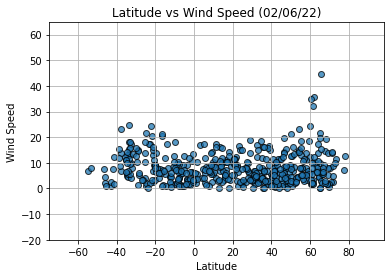

In [154]:
plt.scatter(city_data['Lat'],city_data['Wind Speed'],alpha=0.75,edgecolors='black')
plt.title(f"Latitude vs Wind Speed ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.xlim(min(city_data['Lat'])-20,max(city_data['Lat'])+20)
plt.ylim(min(city_data['Wind Speed'])-20,max(city_data['Wind Speed'])+20)
plt.grid()
plt.savefig("pngs/latvwind.png")

# Data is all over the place, showing no apparent relationship between the two variables, but we do see a sort of
# clustering around 10 MPH. Indicative of a lack of too much variability in this variable.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

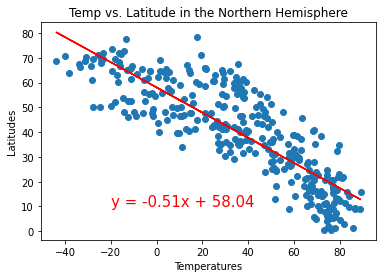

In [156]:
north = city_data.loc[city_data["Lat"] >= 0]
south = city_data.loc[city_data["Lat"] < 0]

x_values = north['Temp']
y_values = north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.title("Temp vs. Latitude in the Northern Hemisphere")
plt.xlabel('Temperatures')
plt.ylabel('Latitudes')
plt.show()

# strong inverse correlation, these two variables tend to move in opposite directions

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

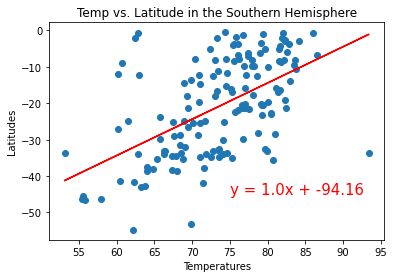

In [159]:

x_values = south['Temp']
y_values = south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,-45),fontsize=15,color="red")
plt.title("Temp vs. Latitude in the Southern Hemisphere")
plt.xlabel('Temperatures')
plt.ylabel('Latitudes')
plt.show()

# strong positive correlation, these two variables tend to move in the same direction

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

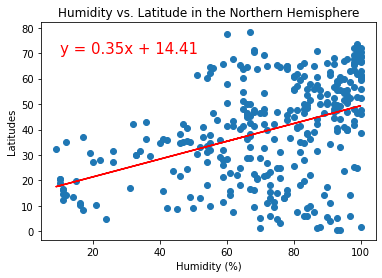

In [161]:
x_values = north['Humidity']
y_values = north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,70),fontsize=15,color="red")
plt.title("Humidity vs. Latitude in the Northern Hemisphere")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitudes')
plt.show()

# positive correlation, these two variables tend to move in the same direction

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

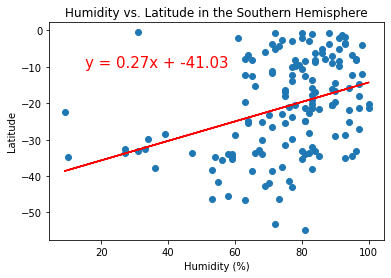

In [166]:
x_values = south['Humidity']
y_values = south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,-10),fontsize=15,color="red")
plt.title("Humidity vs. Latitude in the Southern Hemisphere")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

# positive correlation, these two variables tend to move in the same direction. based on the above regression of humidity 
# in the northern hemisphere it seems like humidity tends to increase the further you are from the equator regardless
# of which direction you're going in

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

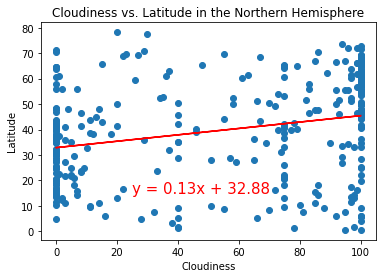

In [167]:
x_values = north['Cloudiness']
y_values = north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,15),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude in the Northern Hemisphere")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

# positive correlation, these two variables tend to move in the same direction

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

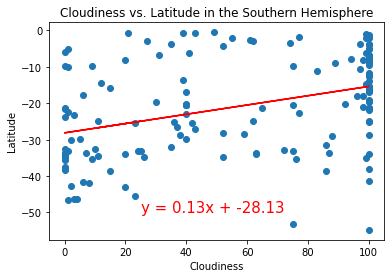

In [168]:
x_values = south['Cloudiness']
y_values = south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,-50),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude in the Southern Hemisphere")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

# positive correlation, these two variables tend to move in the same direction

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

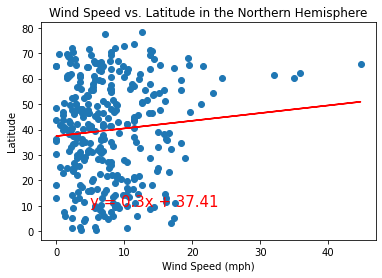

In [169]:
x_values = north['Wind Speed']
y_values = north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude in the Northern Hemisphere")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.show()

# positive correlation, these two variables tend to move in the same direction

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

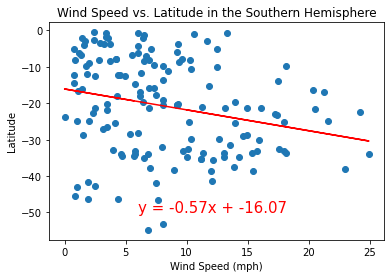

In [170]:
x_values = south['Wind Speed']
y_values = south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-50),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude in the Southern Hemisphere")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.show()

# negative correlation, these two variables tend to move in opposite directions. 